In [1]:
import sklearn
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=[12,6])

In [3]:
np.random.seed(1)
wine_dataset = pd.read_csv("wine_dataset.csv")
print(wine_dataset.info())
wine_dataset.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   class                    5000 non-null   int64  
 1   Alcohol                  5000 non-null   float64
 2   Malic_acid               5000 non-null   float64
 3   Ash                      5000 non-null   float64
 4   Alcalinity_of_ash        5000 non-null   float64
 5   Magnesium                5000 non-null   float64
 6   Total_phenols            5000 non-null   float64
 7   Flavanoids               5000 non-null   float64
 8   Nonflavanoid_phenols     5000 non-null   float64
 9   Proanthocyanins          5000 non-null   float64
 10  Color_intensity          5000 non-null   float64
 11  Hue                      5000 non-null   float64
 12  Od_Hod_of_diluted_wines  5000 non-null   float64
 13  Proline                  5000 non-null   float64
dtypes: float64(13), int64(1)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
0,1,13.761443,0.972960,2.191146,14.349954,106.525734,2.288580,2.584551,0.418044,1.862804,3.086808,1.169861,2.819086,850.678431
1,2,11.897923,1.297780,2.199666,17.478054,104.205421,2.716657,1.855066,0.318077,1.029640,9.103668,1.353718,2.780333,332.922006
2,3,12.659632,1.748552,2.438597,21.584696,88.079451,1.919476,0.681341,0.538078,1.327974,8.803633,0.643678,1.569951,633.531687
3,1,13.054828,1.817559,1.893926,15.390157,108.589893,2.662509,2.815723,0.278535,1.473812,6.386732,0.820398,3.694865,880.103325
4,3,11.769431,3.017528,3.013448,17.081528,86.525235,2.224963,0.846229,0.286065,1.644007,10.383464,0.734288,2.747013,475.152492


In [4]:
# check dimension and null data
print(wine_dataset.shape)

wine_dataset.isna().any().any()

# check stas
wine_dataset.describe()

(5000, 14)


,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.966600,12.995186,2.330916,2.370151,19.496761,99.072699,2.300694,2.057249,0.362036,1.590397,5.086170,0.962753,2.609474,744.635286
std,0.772272,0.814378,1.118433,0.274757,3.351535,13.951364,0.617459,0.992019,0.124728,0.566114,2.337002,0.225385,0.704532,313.348736
min,1.000000,10.991005,0.478367,1.447951,10.366806,68.871553,0.969383,0.277914,0.109327,0.099295,1.129366,0.414259,1.112145,231.883252
25%,1.000000,12.386366,1.592804,2.236354,17.372474,88.827614,1.791985,1.223907,0.270011,1.238714,3.271563,0.802881,1.996074,507.083531
50%,2.000000,13.026910,1.867287,2.369439,19.383204,97.561288,2.324534,2.138558,0.335068,1.546307,4.745563,0.977078,2.770427,665.609642
75%,3.000000,13.624392,2.940638,2.542378,21.429700,105.978061,2.755317,2.808482,0.442366,1.888451,6.214175,1.104621,3.146931,948.204369
max,3.000000,14.802882,6.242546,3.167812,30.236014,164.765854,3.882879,4.397836,0.756410,3.700137,13.120260,1.603007,4.032795,1782.712893


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Separating the target and the rest of the dataset
target = wine_dataset["class"]
wine_dataset.drop(columns=["class"], inplace=True)

# Scaling the data using MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(wine_dataset)

# Transforming the scaled data back to a DataFrame
wine_dataset = pd.DataFrame(x_scaled, columns=wine_dataset.columns)

# Adding the target back to the dataset at the beginning
wine_dataset.insert(0, "class", target)

# Displaying the first few rows
wine_dataset.head(5)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,Od_Hod_of_diluted_wines,Proline
0,1,0.726791,0.085805,0.432125,0.200468,0.392663,0.452788,0.559874,0.477090,0.489749,0.163244,0.635628,0.584439,0.399009
1,2,0.237919,0.142156,0.437079,0.357903,0.368467,0.599717,0.382811,0.322602,0.258369,0.665030,0.790293,0.571170,0.065151
2,3,0.437744,0.220358,0.576004,0.564587,0.200303,0.326101,0.097921,0.662590,0.341220,0.640008,0.192992,0.156748,0.258989
3,1,0.541419,0.232330,0.259309,0.252821,0.414189,0.581132,0.615985,0.261494,0.381721,0.438447,0.341653,0.884296,0.417983
4,3,0.204211,0.440507,0.910246,0.337946,0.184095,0.430953,0.137943,0.273130,0.428986,0.771760,0.269215,0.559762,0.156864


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set up stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=30)

for train_ind, test_ind in split.split(wine_dataset, wine_dataset["class"]):
    train_set = wine_dataset.loc[train_ind]
    test_set = wine_dataset.loc[test_ind]

# Display dataset information
train_set.info()
test_set.info()

# Create X and Y for train and test set
train_X = train_set.drop("class", axis=1)
train_y = train_set["class"]
test_X = test_set.drop("class", axis=1)
test_y = test_set["class"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1725 to 3709
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   class                    4000 non-null   int64  
 1   Alcohol                  4000 non-null   float64
 2   Malic_acid               4000 non-null   float64
 3   Ash                      4000 non-null   float64
 4   Alcalinity_of_ash        4000 non-null   float64
 5   Magnesium                4000 non-null   float64
 6   Total_phenols            4000 non-null   float64
 7   Flavanoids               4000 non-null   float64
 8   Nonflavanoid_phenols     4000 non-null   float64
 9   Proanthocyanins          4000 non-null   float64
 10  Color_intensity          4000 non-null   float64
 11  Hue                      4000 non-null   float64
 12  Od_Hod_of_diluted_wines  4000 non-null   float64
 13  Proline                  4000 non-null   float64
dtypes: float64(13), int64

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Initialize and train the neural network classifier
neural_net = MLPClassifier()
neural_net.fit(train_X, train_y.values.ravel())

# Evaluate the model on the training data
predictions = neural_net.predict(train_X)
accuracy = accuracy_score(train_y, predictions)
f1 = f1_score(train_y, predictions, average='weighted')

print(f"Mean of Predictions: {predictions.mean():.5f}")
print(f"Training Accuracy: {accuracy:.5f}")
print(f"Training F1 Score (weighted): {f1:.5f}")

Mean of Predictions: 1.95375
Training Accuracy: 0.93500
Training F1 Score (weighted): 0.93499


In [11]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores: 10 fold
scores = cross_val_score(neural_net, train_X, train_y.values.ravel(), scoring="f1_weighted", cv=10)

# Display the results
print("Individual Cross-Validation F1 Weighted Scores:", scores)
print("Average F1 Weighted Score:", scores.mean())

Individual Cross-Validation F1 Weighted Scores: [0.9324527  0.93248383 0.92771032 0.93747908 0.91747498 0.93752649
 0.9223526  0.89443844 0.90229465 0.94003248]
Average F1 Weighted Score: 0.9244245572155416


In [12]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

def stratFold(train_X_all, train_y_all, classifier, metric, average=None, fold=5):
    train_metric, val_metric, indices = [], [], []

    for m in range(100, len(train_X_all), 100):
        train_X = train_X_all[:m]
        train_y = train_y_all[:m]
        skfolds = StratifiedKFold(n_splits=fold)
        
        metric_list = []
        metric_list_train = []
        
        for train_index, test_index in skfolds.split(train_X, train_y):
            train_X_folds, test_X_fold = train_X.iloc[train_index], train_X.iloc[test_index]
            train_y_folds, test_y_fold = train_y.iloc[train_index], train_y.iloc[test_index]
            
            classifier.fit(train_X_folds, train_y_folds.values.ravel())
            train_y_folds_pred = classifier.predict(train_X_folds)
            test_y_fold_pred = classifier.predict(test_X_fold)
            
            if average:
                metric_val = metric(y_true=test_y_fold.values, y_pred=test_y_fold_pred, average=average)
                metric_train = metric(y_true=train_y_folds.values, y_pred=train_y_folds_pred, average=average)
            else:
                metric_val = metric(y_true=test_y_fold.values, y_pred=test_y_fold_pred)
                metric_train = metric(y_true=train_y_folds.values, y_pred=train_y_folds_pred)

            metric_list.append(metric_val)
            metric_list_train.append(metric_train)

        val_metric.append(np.mean(metric_list))
        train_metric.append(np.mean(metric_list_train))
        indices.append(m)

    return train_metric, val_metric, indices

In [13]:
def plot_learning_curve(train_scores, val_scores, indices, title, inverse_x=False):
    
    plt.plot(indices, train_scores, "r-+", linewidth=2, label="train", zorder=5)
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation", zorder=5)
    
    plt.title(title, fontsize=14) 
    plt.legend(fontsize=10)
    
    plt.xlabel('Training Instances', fontsize=12)
    plt.ylabel('F1 Score', fontsize=12)
    

    plt.tick_params(axis='both', which='major', labelsize=12) 
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
    
    if inverse_x:
        plt.gca().invert_xaxis()
    
    plt.show()

In [14]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


In [15]:
def neural_net_summary(model):
    print("Number of Layers:", model.n_layers_)
    print("Number of Outputs:", model.n_outputs_)
    print("Hidden Layer Sizes:", model.hidden_layer_sizes)
    print("Alpha (Regularization strength):", model.alpha)
    print("Number of Iterations:", model.n_iter_)
    print("Current Loss:", model.loss_)

    for i, (coef, intercept) in enumerate(zip(model.coefs_, model.intercepts_)):
        print(f"Layer {i + 1} - Number of Neurons:", coef.shape[1])
        print(f"Layer {i + 1} - Number of Weights:", coef.shape[0])

neural_net_summary(neural_net)


Number of Layers: 3
Number of Outputs: 3
Hidden Layer Sizes: (100,)
Alpha (Regularization strength): 0.0001
Number of Iterations: 200
Current Loss: 0.19182811710069728
Layer 1 - Number of Neurons: 100
Layer 1 - Number of Weights: 13
Layer 2 - Number of Neurons: 3
Layer 2 - Number of Weights: 100


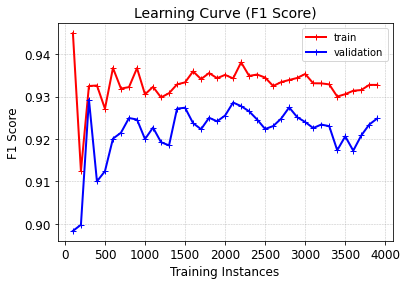

In [16]:
from sklearn.metrics import f1_score

f1_scores = stratFold(train_X, train_y, neural_net, f1_score, average="weighted")

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve (F1 Score)")

In [22]:
# Grid Search on Parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50), (75), (100)],
    'alpha': [0.1, 0.001, 0.001, 0.0001],
    'max_iter': [100, 200, 300],
    'beta_1': [0.75, 0.9, 0.99]
}

search_f1 = GridSearchCV(MLPClassifier(), param_grid, cv=10, 
                      scoring='f1_weighted', n_jobs=-1)

search_f1.fit(train_X, train_y.values.ravel())

# Display best parameters and score
print("Best Parameters:", search_f1.best_params_)
print("Best F1 Score:", search_f1.best_score_)

results = pd.DataFrame(search_f1.cv_results_)

# Display the F1 scores for each combination of parameters
for index, row in results.iterrows():
    print("Hidden_Layer_Size:", row['param_hidden_layer_sizes'])
    print("Alpha:", row['param_alpha'])
    print("Max Iterations:", row['param_max_iter'])
    print("Beta 1:", row['param_beta_1'])
    print("Mean F1 Score:", row['mean_test_score'])
    print("Standard Deviation of F1 Score:", row['std_test_score'])
    print("--------------------------------------------------------")

# Visualizing the learning curve for the best model (if you still want to do this, uncomment)
# f1_scores = stratFold(train_X, train_y, search_f1.best_estimator_, f1_score, average='weighted')
# plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], "Learning Curve (F1 Score)")


Best Parameters: {'alpha': 0.0001, 'beta_1': 0.75, 'hidden_layer_sizes': 100, 'max_iter': 200}
Best F1 Score: 0.9271739293671557
Hidden_Layer_Size: 50
Alpha: 0.1
Max Iterations: 100
Beta 1: 0.75
Mean F1 Score: 0.9209389845453115
Standard Deviation of F1 Score: 0.015844316753605193
--------------------------------------------------------
Hidden_Layer_Size: 50
Alpha: 0.1
Max Iterations: 200
Beta 1: 0.75
Mean F1 Score: 0.9196787670026885
Standard Deviation of F1 Score: 0.016401392458884417
--------------------------------------------------------
Hidden_Layer_Size: 50
Alpha: 0.1
Max Iterations: 300
Beta 1: 0.75
Mean F1 Score: 0.9244448057610478
Standard Deviation of F1 Score: 0.014445657200448296
--------------------------------------------------------
Hidden_Layer_Size: 75
Alpha: 0.1
Max Iterations: 100
Beta 1: 0.75
Mean F1 Score: 0.9219231984689588
Standard Deviation of F1 Score: 0.015900101047187067
--------------------------------------------------------
Hidden_Layer_Size: 75
Alpha: 0.

In [17]:
def plot_complexity(train_scores, val_scores, indices, title, inverse_x=False):
    
    plt.plot(indices, train_scores , "r-+", linewidth=2, label="train", zorder=5)
    plt.plot(indices, val_scores, "b-+", linewidth=2, label="validation", zorder=5)
    
    plt.title(title, fontsize=14)
    plt.legend(fontsize=10)
    
    plt.ylabel('F1 Score', fontsize=12)
    
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
    
    plt.show()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[0.93347135 0.92747793 0.92536513 0.92381089 0.92303151 0.92324865
 0.922308   0.92169696 0.92206018 0.92158919] [0.92421547 0.92318901 0.92418487 0.92172141 0.92094351 0.92170059
 0.91918244 0.92073406 0.91790446 0.91793513] [1.000e-04 1.112e-01 2.223e-01 3.334e-01 4.445e-01 5.556e-01 6.667e-01
 7.778e-01 8.889e-01 1.000e+00]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished


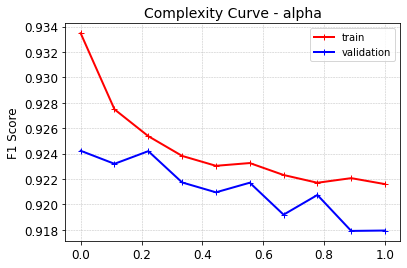

In [18]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(0.0001, 1, 10)

train_scores, test_scores = validation_curve(
    neural_net, train_X, train_y.values.ravel(), param_name="alpha", 
    param_range=param_range, n_jobs=-1,
    scoring='f1_weighted', verbose=1, cv=10
)

print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)

plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='Complexity Curve - alpha')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.6min finished


[0.93285629 0.93202498 0.93219256 0.9309729  0.93105592 0.93005917
 0.9297309  0.92950337 0.92872129 0.92860755 0.92794254 0.92791481
 0.92677359 0.92713911 0.92611677] [0.92500843 0.9254457  0.92446591 0.92466832 0.92523832 0.92320036
 0.92318386 0.92342314 0.92294064 0.92493294 0.9244566  0.923923
 0.92444675 0.9232179  0.92168476] [1.00000000e-04 1.43785714e-02 2.86571429e-02 4.29357143e-02
 5.72142857e-02 7.14928571e-02 8.57714286e-02 1.00050000e-01
 1.14328571e-01 1.28607143e-01 1.42885714e-01 1.57164286e-01
 1.71442857e-01 1.85721429e-01 2.00000000e-01]


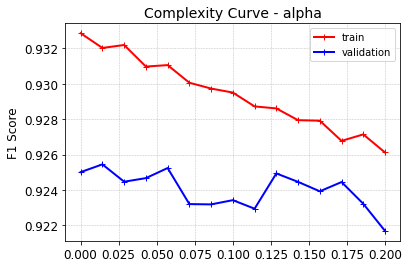

In [21]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(0.0001, 0.2, 15)

train_scores, test_scores = validation_curve(
    neural_net, train_X, train_y.values.ravel(), param_name="alpha", 
    param_range=param_range, n_jobs=-1,
    scoring='f1_weighted', verbose=1, cv=10
)

print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)

plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='Complexity Curve - alpha')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.8min finished


[0.91827542 0.92244098 0.92244472 0.92397111 0.92483239 0.92733501
 0.92738621 0.92711171 0.92814133 0.92874635 0.92916493 0.92852693
 0.9304145  0.93036192 0.93171898 0.93172031 0.93235651 0.93277639
 0.93155403 0.93274889] [0.91644844 0.91821328 0.92144598 0.92169765 0.9219373  0.92168408
 0.92120643 0.92121593 0.92321536 0.92593414 0.92245612 0.92316654
 0.9226772  0.92371893 0.92543562 0.92597399 0.92396125 0.9254595
 0.92446454 0.92593385] [  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100]


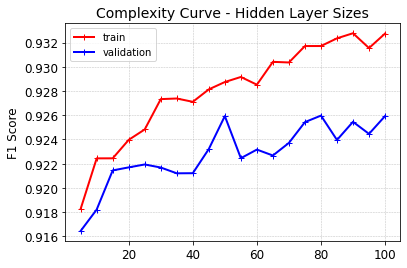

In [19]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(5, 100, 20).astype(int)

train_scores, test_scores = validation_curve(
    neural_net, train_X, train_y.values.ravel(), param_name="hidden_layer_sizes", 
    param_range=param_range, n_jobs=-1,
    scoring='f1_weighted', verbose=1, cv=10
)

print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)

plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='Complexity Curve - Hidden Layer Sizes')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[0.9329172  0.93308007 0.93399989 0.93302965 0.93380222 0.93166196
 0.93274749 0.93138386 0.93174741 0.92952726] [0.92669276 0.92519417 0.92517395 0.92594338 0.92446641 0.92222177
 0.92419063 0.92473669 0.92444177 0.92345748] [0.5        0.55444444 0.60888889 0.66333333 0.71777778 0.77222222
 0.82666667 0.88111111 0.93555556 0.99      ]


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


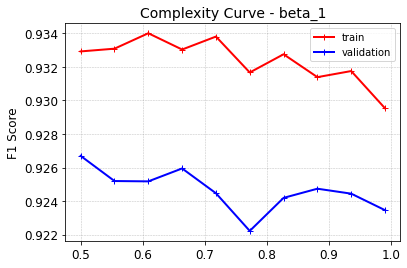

In [20]:
from sklearn.model_selection import validation_curve

param_range = np.linspace(0.5, 0.99, 10)

train_scores, test_scores = validation_curve(
    neural_net, train_X, train_y.values.ravel(), param_name="beta_1", 
    param_range=param_range, n_jobs=-1,
    scoring='f1_weighted', verbose=1, cv=10
)

print(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range)

plot_complexity(train_scores.mean(axis=1), test_scores.mean(axis=1), param_range, 
                title='Complexity Curve - beta_1')

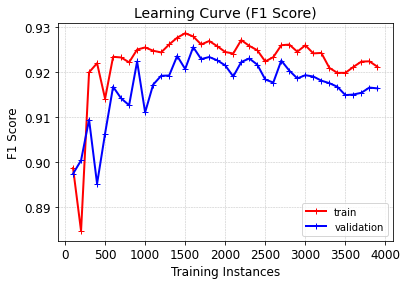

In [33]:
grid_net = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.75,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

f1_scores = stratFold(train_X, train_y, grid_net, f1_score, 
                      average='weighted')

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve (F1 Score)")

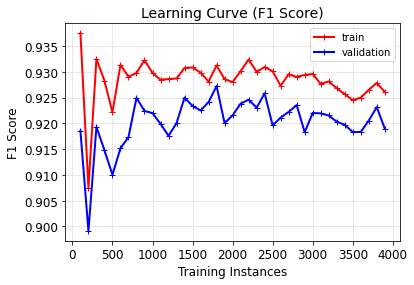

In [34]:
grid_net = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.75,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

f1_scores = stratFold(train_X, train_y, grid_net, f1_score, 
                      average='weighted')

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve (F1 Score)")

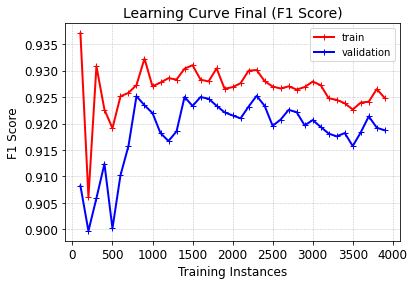

In [35]:
grid_net = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.75,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

f1_scores = stratFold(train_X, train_y, grid_net, f1_score, 
                      average='weighted')

plot_learning_curve(f1_scores[0], f1_scores[1], f1_scores[2], 
                    title="Learning Curve Final (F1 Score)")

In [36]:
from sklearn.metrics import classification_report, confusion_matrix


# Train the model on the training data
grid_net.fit(train_X, train_y)

# Predict on the test data
test_predictions = grid_net.predict(test_X)

# Print the comprehensive classification report
print(classification_report(test_y, test_predictions, digits=5))

# Print the confusion matrix for a detailed breakdown of predictions
print(confusion_matrix(test_y, test_predictions))

              precision    recall  f1-score   support

           1    0.91358   0.93968   0.92645       315
           2    0.93970   0.92804   0.93383       403
           3    0.93885   0.92553   0.93214       282

    accuracy                        0.93100      1000
   macro avg    0.93071   0.93108   0.93081      1000
weighted avg    0.93123   0.93100   0.93103      1000

[[296  12   7]
 [ 19 374  10]
 [  9  12 261]]
